# Исследование объявлений о продаже квартир

Мы имеем данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


###Вывод 


- В таблице 22 колонки:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении


- есть пропуски (NaN)


- есть нарушение хорошего стиля в названии колонки parks_around3000, ponds_around3000, cityCenters_nearest

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Типы данных: bool (колоники: studio, open_plan), всего три колонки типа int64, остальные - object и float64
Необходимо выполнить смену типа данных для колонок за исключением величин, которые установлены в дробных числах (площадь квартиры, площадь кухни)

**К целым числам приведем:**
- last_price — цена на момент снятия с публикации
- floors_total — всего этажей в доме
- balcony — число балконов
- parks_around3000 — число парков в радиусе 3 км
- ponds_around3000 — число водоёмов в радиусе 3 км
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)


**Есть пропуски в данных:**
- Высота потолков ceiling_height известна только для 14504 объявлений
- Общее число этажей floors_total для 23613 
- Жилая площадь living_area  для  21796 
- Площадь кухни kitchen_area для 21421
- Площадь балкона balcony для 12180
- Название населенного пункта locality_name для 23650
- Расстояние до ближайшего аэропорта airports_nearest  для 18157 
- Расстояние до центра cityCenters_nearest для 18180 
- число парков в радиусе 3 км parks_around3000 для 18181 
- Расстояние до ближайшего парка (м) parks_nearest для 8079 
- Число водоёмов в радиусе 3 км ponds_around3000 для 18181 
- Расстояние до ближайшего водоёма (м) ponds_nearest для 9110
- Сколько дней было размещено объявление (от публикации до снятия) days_exposition для 20518 объявлени



In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В каждой строке таблицы — данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В названиях колонок есть нарушения стиля, а ряд данных необходимо перевести к целочисленному виду.

В ряде колонок есть пропуски. 

1. Название населенного пункта locality_name известны только для 23650 из 23699 - значений не много, можем их удалить
2. Общее число этажей floors_total указано только для 23613 из 23699. Так как в данных есть информация и о частных домах, то видимо, для них этот параметр просто не указывали - земеним пропуски на 1 этаж.
3. Если не указаны площадь балконов, а также число парков и прудов в 3 км от жилья, то, скорее всего, их нет, заменим эти значения на 0.
4. Пропуски в значениее "апартаменты" могут означать, что они просто не указаны - заменим их на False
5. Остальные пропущенные значения (площадь кухни, площадь квартиры, сколько дней было размещено объявление (от публикации до снятия), высота потолков, а также все расстояния (до центра, до аэропорта, до парка, до прудов) заменим на медианные значения.

## Предобработка данных

### Обработка пропусков¶

In [4]:
#переименуем столбцы и проверим результат
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around_3000', 
                            'ponds_around3000':'ponds_around_3000'})
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.isna().sum() #посчитаем пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#удалим строки, где пропущены указания населенного пункта и количество этажей в доме
data.dropna(subset=['locality_name'], inplace=True)

data.isna().sum() #проверим удаление строк

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest         5534
city_centers_nearest     5511
parks_around_3000        5510
parks_nearest           15586
ponds_around_3000        5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [7]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
#может ли быть потолок 32 метра? Похоже, что не там поставили запятую.
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10                                                                

In [9]:
#заменим пропущенные значения о высоте потолков на медианные
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
print(data['ceiling_height'].isna().sum()) # проверим, остались ли пропуски, посчитав их сумму

0


In [10]:
print("Корреляция площадей кухни и жилой части квартир составляет:", data['living_area'].corr(data['kitchen_area']))
print("Корреляция жилой и общей площади квартир составляет:", data['living_area'].corr(data['total_area']))
print("Корреляция числа комнат и жилой площади квартир составляет:", data['living_area'].corr(data['rooms']))

Корреляция площадей кухни и жилой части квартир составляет: 0.4287733031335746
Корреляция жилой и общей площади квартир составляет: 0.9395341841776421
Корреляция числа комнат и жилой площади квартир составляет: 0.8460875205534398


In [12]:
#заполним пропуски с группировкой по числу комнат
print('Пропуски до:', data['living_area'].isna().sum())

for living in data['rooms'].unique():
    median = data.loc[data['rooms'] == living, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == living), 'living_area'] = median
    
print('Пропуски после:', data['living_area'].isna().sum())    

Пропуски до: 1898
Пропуски после: 0


In [13]:
data['kitchen_area'].unique()
#можно ли считать правдивой площадь кухни в 100 метров? Наверно, если речь идет об открытой планировке первого 
#этажа коттеджа, то да

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [15]:
print("Корреляция площадей кухни и жилой части квартир составляет:", data['living_area'].corr(data['kitchen_area']))
print("Корреляция жилой и общей площади квартир составляет:", data['kitchen_area'].corr(data['total_area']))
print("Корреляция числа комнат и жилой площади квартир составляет:", data['kitchen_area'].corr(data['rooms']))

Корреляция площадей кухни и жилой части квартир составляет: 0.4242056782705458
Корреляция жилой и общей площади квартир составляет: 0.6088787817469409
Корреляция числа комнат и жилой площади квартир составляет: 0.27058475362279094


In [16]:
#заполним пропуски с группировкой по числу комнат
print('Пропуски до:', data['kitchen_area'].isna().sum())

for living in data['total_area'].unique():
    median = data.loc[data['total_area'] == living, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['total_area'] == living), 'kitchen_area'] = median
    
print('Пропуски после:', data['kitchen_area'].isna().sum())    

      

Пропуски до: 2269


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Пропуски после: 205


In [17]:
#после замены остались пропущенные значения, заменим их на медианные
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
print(data['kitchen_area'].isna().sum())

0


In [18]:
#заменим пропущенные значения растояния до аэропорта на медианные
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
print(data['airports_nearest'].isna().sum()) # проверим, остались ли пропуски, посчитав их сумму

0


In [19]:
#заменим пропущенные значения растояния до центра на медианные
data.loc[data['city_centers_nearest'].isna(), 'city_centers_nearest'] = data['city_centers_nearest'].median()
print(data['city_centers_nearest'].isna().sum()) # проверим, остались ли пропуски, посчитав их сумму

0


In [20]:
#заменим пропущенные значения растояния до ближайшего парка на медианные
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
print(data['parks_nearest'].isna().sum()) # проверим, остались ли пропуски, посчитав их сумму

0


In [21]:
#заменим пропущенные значения растояния до ближайшего пруда на медианные
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()
print(data['ponds_nearest'].isna().sum()) # проверим, остались ли пропуски, посчитав их сумму

0


In [22]:
#найдем дни недели и добавим их в столбец
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['weekday'] = data['first_day_exposition'].dt.weekday
print(data['weekday'].head())

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64


In [25]:
#посмотрим на корреляцию числа дней публикации с другими значениями
print("Корреляция числа дней публикации и расстояния до центра составляет:", data['days_exposition'].corr(data['city_centers_nearest']))
print("Корреляция числа дней публикации и стоимости квартиры составляет:", data['days_exposition'].corr(data['last_price']))
print("Корреляция числа дней публикации и площади квартиры составляет:", data['days_exposition'].corr(data['living_area']))

Корреляция числа дней публикации и расстояния до центра составляет: -0.05212580530389152
Корреляция числа дней публикации и стоимости квартиры составляет: 0.08093749597559409
Корреляция числа дней публикации и площади квартиры составляет: 0.14045799107624354


In [26]:
#заполним пропуски с группировкой по столбцу с наибольшей корреляцией
print('Пропуски до:', data['days_exposition'].isna().sum())

for living in data['living_area'].unique():
    median = data.loc[data['living_area'] == living, 'days_exposition'].median()
    data.loc[(data['days_exposition'].isna()) & (data['living_area'] == living), 'days_exposition'] = median
    
print('Пропуски после:', data['days_exposition'].isna().sum())    


Пропуски до: 3180
Пропуски после: 163


In [27]:
#после замены остались пропущенные значения, заменим их на медианные
data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].median()
print(data['days_exposition'].isna().sum())

0


In [28]:
# определим, какие есть значения у столбца "аппартаменты"
print(data['is_apartment'].value_counts())

False    2710
True       50
Name: is_apartment, dtype: int64


In [29]:
#для всех пропущенных значений зададим False, так как при объявлении о продаже квартир 
#продавцы могли просто не указать что это не аппартаменты
data['is_apartment'] = data['is_apartment'].fillna('False') 
print(data['is_apartment'].isna().sum())

0


In [30]:
#для всех пропущенных значений числа этажей в доме зададим 1 
data['floors_total'] = data['floors_total'].fillna(1) 
print(data['is_apartment'].isna().sum())

0


In [31]:
#для всех пропущенных значений балконов парков и прудов зададим занчение 0
#так как их не указали, занчит, их нет

columns_to_replace = ['balcony', 'parks_around_3000', 'ponds_around_3000']
for index in columns_to_replace:
    data[index] = data[index].fillna(0) 

In [32]:
#проверим, что пропущенных значений не осталось
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
weekday                 0
dtype: int64

### Замена типа данных¶

In [33]:
#приведем данные в целочисленный типа для следующих столбцов     

typ_data = ['last_price','floors_total', 'balcony', 'parks_around_3000',
            'parks_nearest', 'ponds_around_3000','ponds_nearest', 'days_exposition']
for istyp in typ_data:
    data[istyp] = data[istyp].astype('int')
 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centers_nearest    23650 non-null float64
parks_around_3000       23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around_30

### Обработка дубликатов

In [34]:
data.duplicated().sum() #дубликатов не обнаружено

0

In [35]:
#посмотрим на скрытые дубликаты
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [36]:
dublicate = ['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'поселок Новый Свет',
       'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок Романовка', 'посёлок Бугры', 'поселок Бугры',
       'поселок городского типа Рощино', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'село Павлово', 'поселок Оредеж', 'село Копорье',
       'посёлок городского типа Красный Бор', 'посёлок Молодёжное',
       'Тихвин', 'посёлок Победа', 'деревня Нурма',
       'поселок городского типа Синявино', 'Тосно',
       'посёлок городского типа Кузьмоловский', 'посёлок Стрельна',
       'Бокситогорск', 'посёлок Александровская', 'деревня Лопухинка',
       'Пикалёво', 'поселок Терволово',
       'поселок городского типа Советский', 'Подпорожье',
       'посёлок Петровское', 'посёлок городского типа Токсово',
       'поселок Сельцо', 'посёлок городского типа Вырица',
       'деревня Кипень', 'деревня Келози', 'деревня Вартемяги',
       'посёлок Тельмана', 'поселок Севастьяново',
       'городской поселок Большая Ижора', 'городской посёлок Павлово',
       'деревня Агалатово', 'посёлок Новогорелово',
       'городской посёлок Лесогорский', 'деревня Лаголово',
       'поселок Цвелодубово', 'поселок городского типа Рахья',
       'поселок городского типа Вырица', 'деревня Белогорка',
       'поселок Заводской', 'городской посёлок Новоселье',
       'деревня Большие Колпаны', 'деревня Горбунки', 'деревня Батово',
       'деревня Заневка', 'деревня Иссад', 'Приморск',
       'городской посёлок Фёдоровское', 'деревня Мистолово',
       'Новая Ладога', 'поселок Зимитицы', 'поселок Барышево',
       'деревня Разметелево', 'поселок городского типа имени Свердлова',
       'деревня Пеники', 'поселок Рябово', 'деревня Пудомяги',
       'поселок станции Корнево', 'деревня Низино', 'деревня Бегуницы',
       'посёлок Поляны', 'городской посёлок Мга', 'поселок Елизаветино',
       'посёлок городского типа Кузнечное', 'деревня Колтуши',
       'поселок Запорожское', 'посёлок городского типа Рощино',
       'деревня Гостилицы', 'деревня Малое Карлино',
       'посёлок Мичуринское', 'посёлок городского типа имени Морозова',
       'посёлок Песочный', 'посёлок Сосново', 'деревня Аро',
       'поселок Ильичёво', 'посёлок городского типа Тайцы',
       'деревня Малое Верево', 'деревня Извара', 'поселок станции Вещево',
       'село Паша', 'деревня Калитино',
       'посёлок городского типа Ульяновка', 'деревня Чудской Бор',
       'поселок городского типа Дубровка', 'деревня Мины',
       'поселок Войсковицы', 'посёлок городского типа имени Свердлова',
       'деревня Коркино', 'посёлок Ропша',
       'поселок городского типа Приладожский', 'посёлок Щеглово',
       'посёлок Гаврилово', 'Лодейное Поле', 'деревня Рабитицы',
       'поселок городского типа Никольский', 'деревня Кузьмолово',
       'деревня Малые Колпаны', 'поселок Тельмана',
       'посёлок Петро-Славянка', 'городской посёлок Назия',
       'посёлок Репино', 'посёлок Ильичёво', 'поселок Углово',
       'поселок Старая Малукса', 'садовое товарищество Рахья',
       'поселок Аннино', 'поселок Победа', 'деревня Меньково',
       'деревня Старые Бегуницы', 'посёлок Сапёрный', 'поселок Семрино',
       'поселок Гаврилово', 'поселок Глажево', 'поселок Кобринское',
       'деревня Гарболово', 'деревня Юкки',
       'поселок станции Приветнинское', 'деревня Мануйлово',
       'деревня Пчева', 'поселок Поляны', 'поселок Цвылёво',
       'поселок Мельниково', 'посёлок Пудость', 'посёлок Усть-Луга',
       'Светогорск', 'Любань', 'поселок Селезнёво',
       'поселок городского типа Рябово', 'Каменногорск', 'деревня Кривко',
       'поселок Глебычево', 'деревня Парицы', 'поселок Жилпосёлок',
       'посёлок городского типа Мга', 'городской поселок Янино-1',
       'посёлок Войскорово', 'село Никольское', 'посёлок Терволово',
       'поселок Стеклянный', 'посёлок городского типа Важины',
       'посёлок Мыза-Ивановка', 'село Русско-Высоцкое',
       'поселок городского типа Лебяжье',
       'поселок городского типа Форносово', 'село Старая Ладога',
       'поселок Житково', 'городской посёлок Виллози', 'деревня Лампово',
       'деревня Шпаньково', 'деревня Лаврики', 'посёлок Сумино',
       'посёлок Возрождение', 'деревня Старосиверская',
       'посёлок Кикерино', 'поселок Возрождение',
       'деревня Старое Хинколово', 'посёлок Пригородный',
       'посёлок Торфяное', 'городской посёлок Будогощь',
       'поселок Суходолье', 'поселок Красная Долина', 'деревня Хапо-Ое',
       'поселок городского типа Дружная Горка', 'поселок Лисий Нос',
       'деревня Яльгелево', 'посёлок Стеклянный', 'село Рождествено',
       'деревня Старополье', 'посёлок Левашово', 'деревня Сяськелево',
       'деревня Камышовка',
       'садоводческое некоммерческое товарищество Лесная Поляна',
       'деревня Хязельки', 'поселок Жилгородок',
       'посёлок городского типа Павлово', 'деревня Ялгино',
       'поселок Новый Учхоз', 'городской посёлок Рощино',
       'поселок Гончарово', 'поселок Почап', 'посёлок Сапёрное',
       'посёлок Платформа 69-й километр', 'поселок Каложицы',
       'деревня Фалилеево', 'деревня Пельгора',
       'поселок городского типа Лесогорский', 'деревня Торошковичи',
       'посёлок Белоостров', 'посёлок Алексеевка', 'поселок Серебрянский',
       'поселок Лукаши', 'поселок Петровское', 'деревня Щеглово',
       'поселок Мичуринское', 'деревня Тарасово', 'поселок Кингисеппский',
       'посёлок при железнодорожной станции Вещево', 'поселок Ушаки',
       'деревня Котлы', 'деревня Сижно', 'деревня Торосово',
       'посёлок Форт Красная Горка', 'деревня Новолисино',
       'посёлок станции Громово', 'деревня Глинка', 'посёлок Мельниково',
       'поселок городского типа Назия', 'деревня Старая Пустошь',
       'поселок Коммунары', 'поселок Починок',
       'посёлок городского типа Вознесенье', 'деревня Разбегаево',
       'посёлок городского типа Рябово', 'поселок Гладкое',
       'посёлок при железнодорожной станции Приветнинское',
       'поселок Тёсово-4', 'посёлок Жилгородок', 'деревня Бор',
       'посёлок Коробицыно', 'деревня Большая Вруда', 'деревня Курковицы',
       'посёлок Лисий Нос', 'городской посёлок Советский',
       'посёлок Кобралово', 'деревня Суоранда', 'поселок Кобралово',
       'поселок городского типа Кондратьево',
       'коттеджный поселок Счастье', 'поселок Любань', 'деревня Реброво',
       'деревня Зимитицы', 'деревня Тойворово', 'поселок Семиозерье',
       'поселок Лесное', 'поселок Совхозный', 'поселок Усть-Луга',
       'посёлок Ленинское', 'посёлок Суйда',
       'посёлок городского типа Форносово', 'деревня Нижние Осельки',
       'посёлок станции Свирь', 'поселок Перово', 'Высоцк',
       'поселок Гарболово', 'село Шум', 'поселок Котельский',
       'поселок станции Лужайка', 'деревня Большая Пустомержа',
       'поселок Красносельское', 'деревня Вахнова Кара', 'деревня Пижма',
       'коттеджный поселок Кивеннапа Север', 'поселок Коробицыно',
       'поселок Ромашки', 'посёлок Перово', 'деревня Каськово',
       'деревня Куровицы', 'посёлок Плоское', 'поселок Сумино',
       'поселок городского типа Большая Ижора', 'поселок Кирпичное',
       'деревня Ям-Тесово', 'деревня Раздолье', 'деревня Терпилицы',
       'поселок городского типа Токсово', 'посёлок Шугозеро',
       'деревня Ваганово', 'поселок Пушное', 'садовое товарищество Садко',
       'посёлок Усть-Ижора', 'деревня Выскатка',
       'городской посёлок Свирьстрой', 'поселок Громово',
       'деревня Кисельня', 'посёлок Старая Малукса',
       'деревня Трубников Бор', 'поселок Калитино',
       'посёлок Высокоключевой', 'садовое товарищество Приладожский',
       'посёлок Пансионат Зелёный Бор', 'деревня Ненимяки',
       'поселок Пансионат Зелёный Бор', 'деревня Снегирёвка',
       'деревня Рапполово', 'деревня Пустынка', 'поселок Рабитицы',
       'деревня Большой Сабск', 'деревня Русско', 'деревня Лупполово',
       'деревня Большое Рейзино', 'деревня Малая Романовка',
       'поселок Дружноселье', 'поселок Пчевжа', 'поселок Володарское',
       'деревня Нижняя', 'коттеджный посёлок Лесное', 'деревня Тихковицы',
       'деревня Борисова Грива', 'посёлок Дзержинского']

In [37]:
from nltk.stem import SnowballStemmer
russian_stemmer = SnowballStemmer('russian')
for query in dublicate:
    for word in query.split():
        stemmed_word = russian_stemmer.stem(word)
        if stemmed_word == 'поселок':
            print(query)


посёлок Шушары
городской посёлок Янино-1
посёлок Парголово
посёлок Мурино
поселок городского типа Красный Бор
поселок Мурино
посёлок Металлострой
посёлок городского типа Лебяжье
посёлок городского типа Сиверский
поселок Молодцово
поселок городского типа Кузьмоловский
посёлок Аннино
поселок городского типа Ефимовский
посёлок Плодовое
поселок Торковичи
поселок Первомайское
посёлок Понтонный
посёлок Новый Свет
поселок Новый Свет
поселок Романовка
посёлок Бугры
поселок Бугры
поселок городского типа Рощино
поселок Оредеж
посёлок городского типа Красный Бор
посёлок Молодёжное
посёлок Победа
поселок городского типа Синявино
посёлок городского типа Кузьмоловский
посёлок Стрельна
посёлок Александровская
поселок Терволово
поселок городского типа Советский
посёлок Петровское
посёлок городского типа Токсово
поселок Сельцо
посёлок городского типа Вырица
посёлок Тельмана
поселок Севастьяново
городской поселок Большая Ижора
городской посёлок Павлово
посёлок Новогорелово
городской посёлок Лесогорский


In [38]:
#видим, что слово поселок пишется с Е и Ё - надо заменить

data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'поселок Мурино')
data['locality_name'] = data['locality_name'].replace('посёлок Новый Свет', 'поселок Новый Свет')
data['locality_name'] = data['locality_name'].replace('посёлок Бугры', 'поселок Бугры')
data['locality_name'] = data['locality_name'].replace('посёлок Кобралово', 'поселок Кобралово')
data['locality_name'] = data['locality_name'].replace('посёлок Пансионат Зелёный Бор', 'поселок Пансионат Зелёный Бор')

In [39]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [40]:
data['locality_name'] = data['locality_name'].str.lower() #удаляем верхний регистр в столбе с названием населенных пунктов


In [41]:
data.duplicated().sum() #дубликатов не обнаружено

0

### Вывод

При обработке данных были выялены аномальные значения высоты потолков. Вероятно, они получились из-за неверного написания дробного числа - не там поставлена точка. Как выход из ситуации - поделили аномально выскоие потолки на 10.


При подробном знакомстве с названиями населенных пунктов, где продаются квартиры, были обнаружены разные написания одного и того же населенного пункта. В частности, это "поселок" и "посёлок". После того, как написание было приведенено к единому стилю, удалось найти и удалить несколько дублирующих названий. Однако на общем числе дубликатов это не отразилось - согласно проведенному анализу, их в таблице не было. 

## Расчёты и добавление результатов в таблицу

In [42]:
#почситаем цену квадратоного метра: разделим цену на площадь и добавим новый столбец
data['metr_price'] = data['last_price'] / data['total_area']

In [43]:
# соотношение жилой и общей площади
data['living_area_total'] = data['living_area'] / data['total_area']

In [44]:
# соотношение площиди кухни к общей площади
data['kitchen_area_total'] = data['kitchen_area'] / data['total_area']

In [45]:
#аномальных значений в этажах не обнаружено
print(data['floor'].value_counts())

2     3353
3     3065
1     2912
4     2802
5     2616
6     1302
7     1215
8     1083
9     1050
10     687
12     525
11     523
13     379
15     343
14     335
16     315
17     227
18     178
19     147
21     123
22     112
20     110
23      99
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64


In [46]:
#добавим категории этажей квартир: первый, последний, другие
def floor_income(row):
    
    floors = row['floor']
    total_floors = row['floors_total']
    
    if floors == total_floors:
        return 'Последний этаж'
    if floors == 1:
        return 'Первый этаж'       
    
    return 'Другие'

In [47]:
#применим функцию и создадим новый столбец
data['floor_income'] = data.apply(floor_income, axis=1)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,weekday,metr_price,living_area_total,kitchen_area_total,floor_income
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,140,3,120370.370370,0.472222,0.231481,Другие
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.6,1,False,...,0,454,0,502,81,1,82920.792079,0.460396,0.272277,Первый этаж
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.3,4,False,...,1,90,2,574,558,3,92785.714286,0.612500,0.148214,Другие
3,0,64900000,159.00,2015-07-24,3,2.65,14,45.0,9,False,...,2,84,3,234,424,4,408176.100629,0.283019,0.094340,Другие
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121,1,100000.000000,0.320000,0.410000,Другие
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.3,3,False,...,1,796,3,381,452,1,72490.845228,0.547792,0.103356,Другие
23695,14,3100000,59.00,2018-01-15,3,2.65,5,38.0,4,False,...,0,454,0,502,45,0,52542.372881,0.644068,0.144068,Другие
23696,18,2500000,56.70,2018-02-11,2,2.65,3,29.7,1,False,...,0,454,0,502,89,6,44091.710758,0.523810,0.148148,Первый этаж
23697,13,11475000,76.75,2017-03-28,2,3.00,17,30.5,12,False,...,2,173,3,196,602,1,149511.400651,0.397394,0.303583,Другие


In [48]:
#найдем дни недели и добавим их в столбец
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['weekday'] = data['first_day_exposition'].dt.weekday
print(data['weekday'].head())


0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64


In [49]:
#найдем месяцы и добавим их в столбец
data['month'] = data['first_day_exposition'].dt.month
print(data['month'].head())

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64


In [50]:
#найдем годы и добавим их в столбец
data['year'] = data['first_day_exposition'].dt.year
print(data['year'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23650 non-null int64
last_price              23650 non-null int64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null int64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
city_centers_nearest    23650 non-null float64
parks_around_3000       23650 non-null int64
parks_nearest           23650 non-null int64
ponds_around_30

### Вывод

Мы посчитали цену квадратного метра, выяснили соотношение жилой и общей площади, а также отношение площади кухни к общей.
А также опрелелили день недели, месяц и год публикации объявления. И провели категоризацию всех объявлений в зависимости от этажа, на котором находится продаваемая квартира: первый, последний, другой.


В результате, у нас в таблице 29 столбцов и 23650 строк. 



## Исследовательский анализ данных

### Площадь, цена, число комнат, высота потолков

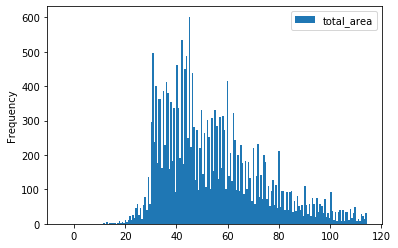

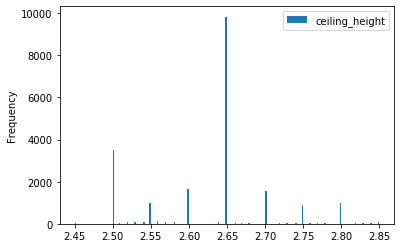

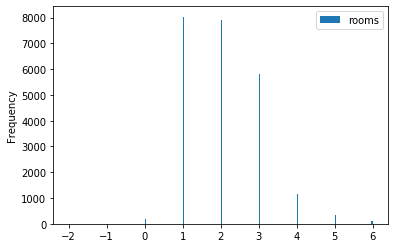

In [52]:
#посмотрим на графиках, как различаются площади, высота потолков и число комнат продаваемых квартир


hist_data = ['total_area', 'ceiling_height', 'rooms']
for step in hist_data:
# расчет IQR
    q1 = data[step].quantile(0.25)
    q3 = data[step].quantile(0.75)
    iqr = q3 - q1
    data.plot(y=step, kind='hist', bins=200, range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr))
    


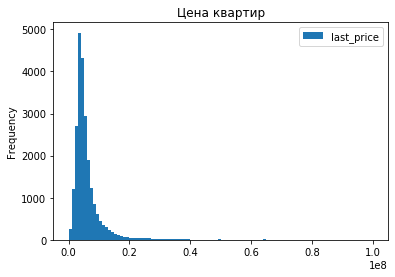

In [53]:
#цена квартир измеряется от 10**4 до 10**8 - поэтому лучше построим отдельную гистограмму
#data['last_price'].hist(bins=100, range=(10**4,10**8))
data.plot(y='last_price', kind='hist', bins=100, range=(10**4,10**8), title='Цена квартир')

### Вывод

Пик площадей продаваемых квартир приходится в районе 50 кв метров, посе 100 идет резкое уменьшение - полученные данные согласуются с data.describe() - среднее значение 52 кв метра, максимальное - 900. График цены на квартиры также имеет выраженный пик, однако, есть и отдельные значения, которые выбиваются из общего объема данных. 
Кроме того, есть яроко выраженные пики значений высоты потолков и числа комнат.

### Время продажи квартиры

Text(0, 0.5, 'Число поданных объявлений')

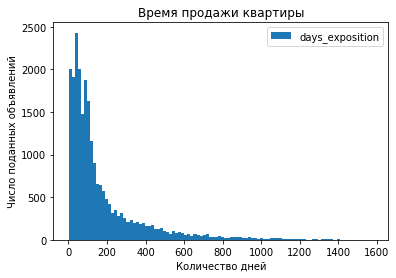

In [54]:
#изучим время продажи квартиры
#data['days_exposition'].hist()
data.plot(y='days_exposition', kind='hist', bins=100, title='Время продажи квартиры')
plt.xlabel('Количество дней')
plt.ylabel('Число поданных объявлений')

In [55]:
#большинсвто квартир продаются в первые 150 дней после подачи объявления. Однако, есть показатели и свыше 1400 дней
print(data['days_exposition'].value_counts())

45      957
60      635
90      313
96      289
7       234
       ... 
775       1
807       1
871       1
951       1
1223      1
Name: days_exposition, Length: 1141, dtype: int64


In [56]:
print('Медианное время продажи квартир составляет:', data['days_exposition'].median())
print('Среднее время продажи квартир составляет:', data['days_exposition'].mean())

Медианное время продажи квартир составляет: 96.0
Среднее время продажи квартир составляет: 171.91467230443973


In [57]:
#добавим категории по времени продажи квартир: быстро, средний показатель, очень долго
def days_exposition_incom (row):
    
    exposition_days = row['days_exposition']
  
    
    if exposition_days < 95:
        return 'Быстрая продажа'
    if exposition_days > 365:
        return 'Долгая продажа'       
    
    return 'Среднее время продажи'

In [58]:
#применим функцию и создадим новый столбец с категорий по времени продажи квартиры
data['time_exposition_days'] = data.apply(days_exposition_incom, axis=1)
print(data['time_exposition_days'].head(10))

0    Среднее время продажи
1          Быстрая продажа
2           Долгая продажа
3           Долгая продажа
4    Среднее время продажи
5          Быстрая продажа
6    Среднее время продажи
7          Быстрая продажа
8    Среднее время продажи
9    Среднее время продажи
Name: time_exposition_days, dtype: object


In [59]:
print(data['time_exposition_days'].value_counts())

Быстрая продажа          11621
Среднее время продажи     8931
Долгая продажа            3098
Name: time_exposition_days, dtype: int64


In [60]:
slow_time_data = data[data['time_exposition_days'] == 'Долгая продажа']


In [61]:
print(slow_time_data['locality_name'].value_counts().head(10))

санкт-петербург      2124
поселок мурино         58
всеволожск             54
гатчина                47
пушкин                 46
посёлок шушары         45
деревня кудрово        40
посёлок парголово      39
колпино                33
сестрорецк             32
Name: locality_name, dtype: int64


### Вывод

Большинство квартир продаются в течение первого года, причем, даже большая из них часть - в первые три месяца (95 дней).
Однако, свыше 3 тыс. квартир не продавались 1,5 и более года - ожидаемо, что среди лидеров с такими квартирами в основном  поселки, деревни и небольшие пригороды Петербурга, теряющие население.


### Редкие и выбивающиеся значения

(0, 1000)

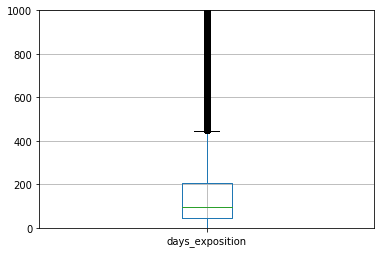

In [62]:
#Посмотрим на вбросы значений столбца с числом дней  размещения объявления (от публикации до снятия)

boxplot = data.boxplot(column=['days_exposition'])
plt.ylim(0, 1000)


In [63]:
#определим аномально быстрые значения времени продажи
fast_time_exposition_days = data[data['time_exposition_days'] == 'Быстрая продажа'] 
                                

print(fast_time_exposition_days['days_exposition'].value_counts().sort_values())

1       1
2       3
51     54
83     65
31     66
     ... 
30    209
7     234
90    313
60    635
45    957
Name: days_exposition, Length: 94, dtype: int64


In [64]:
#аномально быстрых продаж всего три - квартиры продавались за 1-2 дня

display(fast_time_exposition_days[fast_time_exposition_days['days_exposition'] == 1])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,metr_price,living_area_total,kitchen_area_total,floor_income,month,year,time_exposition_days
1632,19,4000000,49.9,2019-05-01,2,2.5,9,25.0,1,False,...,681,1,2,80160.320641,0.501002,0.200401,Первый этаж,5,2019,Быстрая продажа


In [65]:
#аномально быстрых продаж всего четыре - квартиры продавались за 1-2 дня
#примечательно, что квартиры, проданные за два дня - объявления были поданы с разницей в один день
display(fast_time_exposition_days[fast_time_exposition_days['days_exposition'] == 2])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,metr_price,living_area_total,kitchen_area_total,floor_income,month,year,time_exposition_days
13061,20,6100000,51.4,2019-04-29,2,3.00,5,31.7,4,False,...,502,2,0,118677.042802,0.616732,0.134241,Другие,4,2019,Быстрая продажа
16053,4,4070000,45.1,2019-04-30,2,2.65,5,22.7,3,False,...,502,2,1,90243.902439,0.503326,0.146341,Другие,4,2019,Быстрая продажа
16212,0,7806000,25.0,2019-04-30,1,3.00,5,17.6,5,False,...,502,2,1,312240.000000,0.704000,0.200000,Последний этаж,4,2019,Быстрая продажа


In [66]:
#удаляем подозрительные значения из датафрейма
good_time_exposition_days = data[data['days_exposition'] > 2]

In [67]:
print(good_time_exposition_days['days_exposition'].value_counts().sort_values())

1391      1
1200      1
1232      1
1280      1
1361      1
       ... 
7       234
96      289
90      313
60      635
45      957
Name: days_exposition, Length: 1139, dtype: int64


In [68]:
#тперь проверим аномально длинные продажи
slow_time_exposition_days = data[data['time_exposition_days'] == 'Долгая продажа'] 
                                

print(slow_time_exposition_days['days_exposition'].value_counts().sort_values())

1553     1
921      1
709      1
699      1
693      1
        ..
468     18
370     18
383     19
385     20
388     27
Name: days_exposition, Length: 776, dtype: int64


In [69]:
#видим, что одно объявление провесело почти пять лет
display(slow_time_exposition_days[slow_time_exposition_days['days_exposition'] == 1553])

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,weekday,metr_price,living_area_total,kitchen_area_total,floor_income,month,year,time_exposition_days
9553,11,10600000,80.0,2014-12-09,3,2.85,17,44.0,9,False,...,502,1553,1,132500.0,0.55,0.1875,Другие,12,2014,Долгая продажа


In [70]:
#удаляем подозрительные значения из датафрейма, согласно боксплоту все, что больше 420 можно считать вбросами данных
good_time_exposition_days = good_time_exposition_days[good_time_exposition_days['days_exposition'] < 420]

In [71]:
print(good_time_exposition_days['days_exposition'].value_counts().sort_values())

373      3
405      5
382      6
415      6
362      7
      ... 
7      234
96     289
90     313
60     635
45     957
Name: days_exposition, Length: 417, dtype: int64


In [72]:
#таблица без аномальных по времени продажи объявлений
good_time_exposition_days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21178 entries, 0 to 23698
Data columns (total 30 columns):
total_images            21178 non-null int64
last_price              21178 non-null int64
total_area              21178 non-null float64
first_day_exposition    21178 non-null datetime64[ns]
rooms                   21178 non-null int64
ceiling_height          21178 non-null float64
floors_total            21178 non-null int64
living_area             21178 non-null float64
floor                   21178 non-null int64
is_apartment            21178 non-null object
studio                  21178 non-null bool
open_plan               21178 non-null bool
kitchen_area            21178 non-null float64
balcony                 21178 non-null int64
locality_name           21178 non-null object
airports_nearest        21178 non-null float64
city_centers_nearest    21178 non-null float64
parks_around_3000       21178 non-null int64
parks_nearest           21178 non-null int64
ponds_around_30

(10000, 1000000)

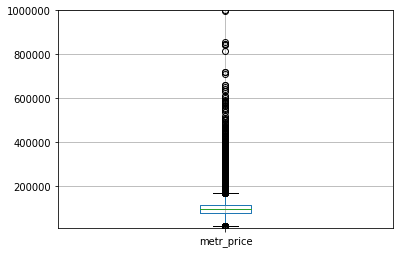

In [73]:
#Посмотрим на вбросы значений столбца с ценой за км метр

boxplot = data.boxplot(column=['metr_price'])

plt.ylim(10000, 1000000)


In [74]:
#проверим аномалии в цене, возбмем цену за квадратный метр
print(good_time_exposition_days['metr_price'].value_counts().sort_values())

129914.529915      1
113053.613054      1
89337.175793       1
97709.923664       1
219178.082192      1
                ... 
125000.000000     48
80000.000000      48
75000.000000      54
83333.333333      57
100000.000000    235
Name: metr_price, Length: 13670, dtype: int64


In [75]:
print('Медианная цена кв метра составляет:', good_time_exposition_days['metr_price'].median())
print('Средняя цена кв метра составляет:', good_time_exposition_days['metr_price'].mean())
print('Наименьшая цена кв метра составляет:', good_time_exposition_days['metr_price'].min())
print('Наибольшая цена кв метра составляет:', good_time_exposition_days['metr_price'].max())

Медианная цена кв метра составляет: 95000.0
Средняя цена кв метра составляет: 98910.65196745323
Наименьшая цена кв метра составляет: 111.8348623853211
Наибольшая цена кв метра составляет: 1907500.0


In [76]:
#удалим из датафрейма аномально низкие и аномально высокие показатели
good_price_time_data = good_time_exposition_days.query('10000 < metr_price < 200000')
print(good_price_time_data['metr_price'].max())

199880.27138486097


In [77]:
#проверим аномалии в числе комнат
good_price_time_data['rooms'].value_counts().sort_values()

15       1
11       1
19       1
14       2
10       3
9        4
8        7
7       45
6       75
0      185
5      228
4      920
3     4950
2     7054
1     7268
Name: rooms, dtype: int64

In [78]:
#192 квартиры имееют 0 комнат - скорее всего, это квартиры со свободной планировкойзаменим это значение на 1
#таке уберем квартиры с 10 и более комнатами

good_price_time_data['rooms'].value_counts().sort_values()

15       1
11       1
19       1
14       2
10       3
9        4
8        7
7       45
6       75
0      185
5      228
4      920
3     4950
2     7054
1     7268
Name: rooms, dtype: int64

In [79]:
#заменим 0 на 1
good_price_time_data['rooms'] = good_price_time_data['rooms'].replace(0, 1)
pd.set_option('chained_assignment', None)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
print('Медианное число комнат составляет:', good_time_exposition_days['rooms'].median())
print('Среднее число комнат составляет:', good_time_exposition_days['rooms'].mean())
print('Наименьшее число комнат составляет:', good_time_exposition_days['rooms'].min())
print('Наибольшее число комнат составляет:', good_time_exposition_days['rooms'].max())

Медианное число комнат составляет: 2.0
Среднее число комнат составляет: 2.0429691188969685
Наименьшее число комнат составляет: 0
Наибольшее число комнат составляет: 19


(0, 20)

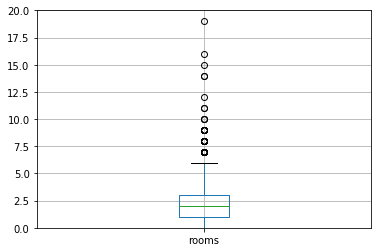

In [81]:
#Посмотрим на вбросы значений столбца с числом комнат

boxplot = data.boxplot(column=['rooms'])

plt.ylim(0, 20)

In [82]:
#удалим аномальные значения числа комнат - свыше 6
good_price_time_data = good_price_time_data.query('rooms < 6')
print(good_price_time_data['rooms'].unique())

[3 1 2 4 5]


**Вывод**


Редкие и выбивающиеся значения могу портить общую картину. Так, оказалось, что ряд квартир были проданы либо в считанные дни, либо объявления о продажах висели годами, что мешает верной интерперетации данных. Построение диаграммы размаха показало, что есть вбросы данных также в столбце со стоимостью квадратного метра и с числом комнат - их мы удаляем. 

### Факторы, которые больше всего влияют на стоимость квартиры

#### Зависимость цены от площади

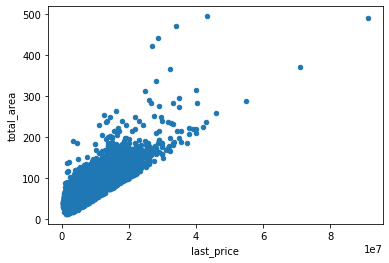

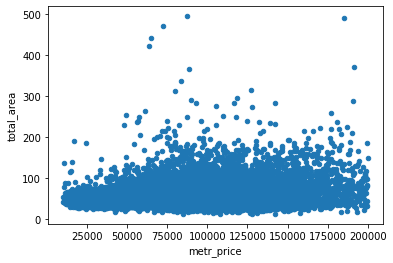

In [83]:
#построим графики для общей цены и для цены за кв метр
data_set = ['last_price', 'metr_price']
for plot in data_set:
    good_price_time_data.plot(x=plot, y='total_area', kind='scatter')

In [84]:
#вполне логично - чем больше площадь, тем больше стоимость, корреляция весьма высокая
good_price_time_data['last_price'].corr(good_price_time_data['total_area'])


0.8240903022599326

In [85]:
# при этом площадь почти не влияет на цену квадратного метра
good_price_time_data['metr_price'].corr(good_price_time_data['total_area'])

0.12498089667908349

#### Зависимость цены от числа комнат

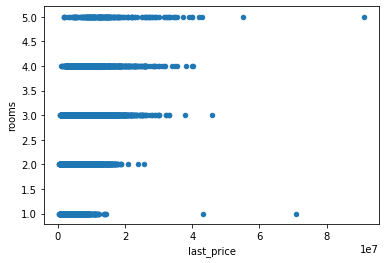

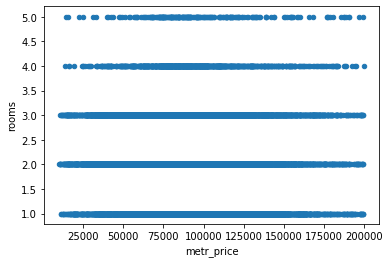

In [86]:
#построим графики для общей цены и для цены за кв метр
data_rooms = ['last_price', 'metr_price']
for slot in data_rooms:
    good_price_time_data.plot(x=slot, y='rooms', kind='scatter')


In [87]:
#зависимоть цены от числа комнат очень неоднородна, корреляция весьма слабая, но положительная
good_price_time_data['last_price'].corr(good_price_time_data['rooms'])

0.5030952159278845

In [88]:
#зависимоть цены кв метра от числа комнат ниже, чем общей цены 
good_price_time_data['metr_price'].corr(good_price_time_data['rooms'])

-0.09052925357856124

#### Зависимость цены от удаленности от центра

Text(0, 0.5, 'Расстояние до центра Петербурга в метрах')

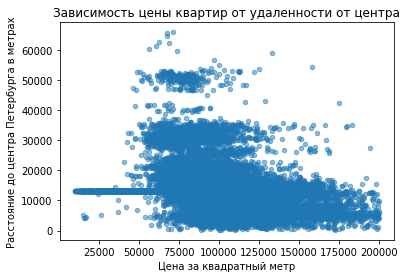

In [89]:
good_price_time_data.plot(x='metr_price', y='city_centers_nearest', kind='scatter', alpha=0.5, 
                          title='Зависимость цены квартир от удаленности от центра')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Расстояние до центра Петербурга в метрах')

In [90]:
#корреляция отрицательная - тоже логично, что чем дальше от центра, тем выше цена
#однако, в данных встречается загородая недвижимость, цена которой все-таки не так сильно зависит от расстояния до центра
#в итоге имеем небольшую отрицательную корреляцию
good_price_time_data['metr_price'].corr(good_price_time_data['city_centers_nearest'])

-0.2352189051496689

#### Зависимость цены от этажа, на котором расположена квартира

Text(0, 0.5, 'Этаж')

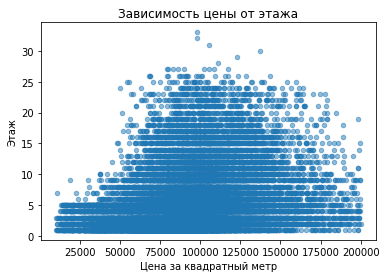

In [91]:
#высота этажа влияет уже не на общую стоимость квартиры, а на квадратный метр
good_price_time_data.plot(x='metr_price', y='floor', kind='scatter', alpha=0.5,
                          title='Зависимость цены от этажа')
plt.xlabel('Цена за квадратный метр')
plt.ylabel('Этаж')

In [92]:
# цена квадратного метра почти не зависит от этажа
good_price_time_data['metr_price'].corr(good_price_time_data['floor'])

0.2397775593074245

#### Зависимость цены от от даты размещения: дня недели, месяца и года

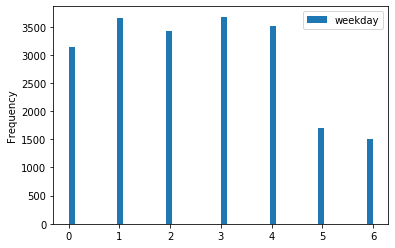

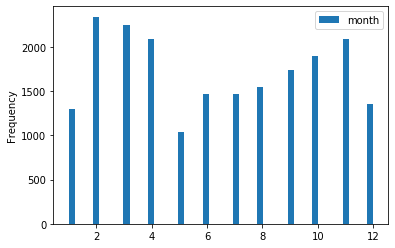

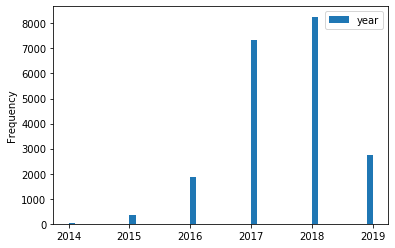

In [93]:
data_time = ['weekday', 'month', 'year']
for time in data_time:
    
    good_price_time_data.plot(x='metr_price', y= time, kind='hist', bins=50)

#### Вывод

Сильнее всего на цену влияет ее площадь - тут все понятно, чем больше квартира, тем выше ее стоимость.

Далее следует удаленность от центра. Но тут уже все не так просто - так как в данных есть объявления о загородной неждвижимости, то цена, например, коттеджа под Питером, может превышать стоимость небольшой квартиры в его центре.

Есть зависимость цены от дня недели, в который было размещено объявление - неожиданно, но в выходные эта цена ниже.Также есть "провал" по ценам в летние месяцы (сезон отпусков, спад деловой активности) и в январе-декабре, что также объясняется концом-началом года и Новогодними праздниками. 

Кроме того, как следует из графиков, пик стоимости жилья в Петербурге и области пришелся на 2017-2018 годы, затем эта стоимость упала практически в два раза.


### Населенные пункты с наибольшим числом объявлений

In [94]:
top_cities = good_price_time_data['locality_name'].value_counts().sort_values(ascending=False).head(10)
print(top_cities)


санкт-петербург      13457
поселок мурино         510
посёлок шушары         405
всеволожск             350
пушкин                 326
колпино                315
посёлок парголово      299
гатчина                273
деревня кудрово        263
выборг                 213
Name: locality_name, dtype: int64


In [95]:
#создадим новую таблицу с данными по числу 10 топ-городов
top = ['санкт-петербург', 'поселок мурино', 'посёлок шушары', 'всеволожск', 'пушкин',
       'колпино', 'посёлок парголово', 'гатчина', 'деревня кудрово','выборг']

top_cities_table = good_price_time_data[good_price_time_data['locality_name'].isin(top)].reset_index(drop=True)

print(top_cities_table.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 30 columns):
total_images            16411 non-null int64
last_price              16411 non-null int64
total_area              16411 non-null float64
first_day_exposition    16411 non-null datetime64[ns]
rooms                   16411 non-null int64
ceiling_height          16411 non-null float64
floors_total            16411 non-null int64
living_area             16411 non-null float64
floor                   16411 non-null int64
is_apartment            16411 non-null object
studio                  16411 non-null bool
open_plan               16411 non-null bool
kitchen_area            16411 non-null float64
balcony                 16411 non-null int64
locality_name           16411 non-null object
airports_nearest        16411 non-null float64
city_centers_nearest    16411 non-null float64
parks_around_3000       16411 non-null int64
parks_nearest           16411 non-null int64
ponds_around_30

In [96]:
#Посчитаем среднюю цену квадратного метра в этих населённых пунктах
print('Средняя стоимость квадратного метра в топ-10 городов равна:', top_cities_table['metr_price'].mean())

Средняя стоимость квадратного метра в топ-10 городов равна: 103301.10939420585


In [97]:
#посчитаем среднюю стоимость жилья для каждого из 10 населенных пунктов
top_cities_table.groupby('locality_name')['metr_price'].mean().sort_values(ascending=False)


locality_name
санкт-петербург      108232.194090
пушкин               102056.022758
деревня кудрово       92694.813096
посёлок парголово     89913.964684
поселок мурино        85934.671854
посёлок шушары        78805.687483
колпино               75283.283665
гатчина               69000.851461
всеволожск            67324.099500
выборг                58228.676038
Name: metr_price, dtype: float64

Text(0, 0.5, 'Цена за квадратный метр')

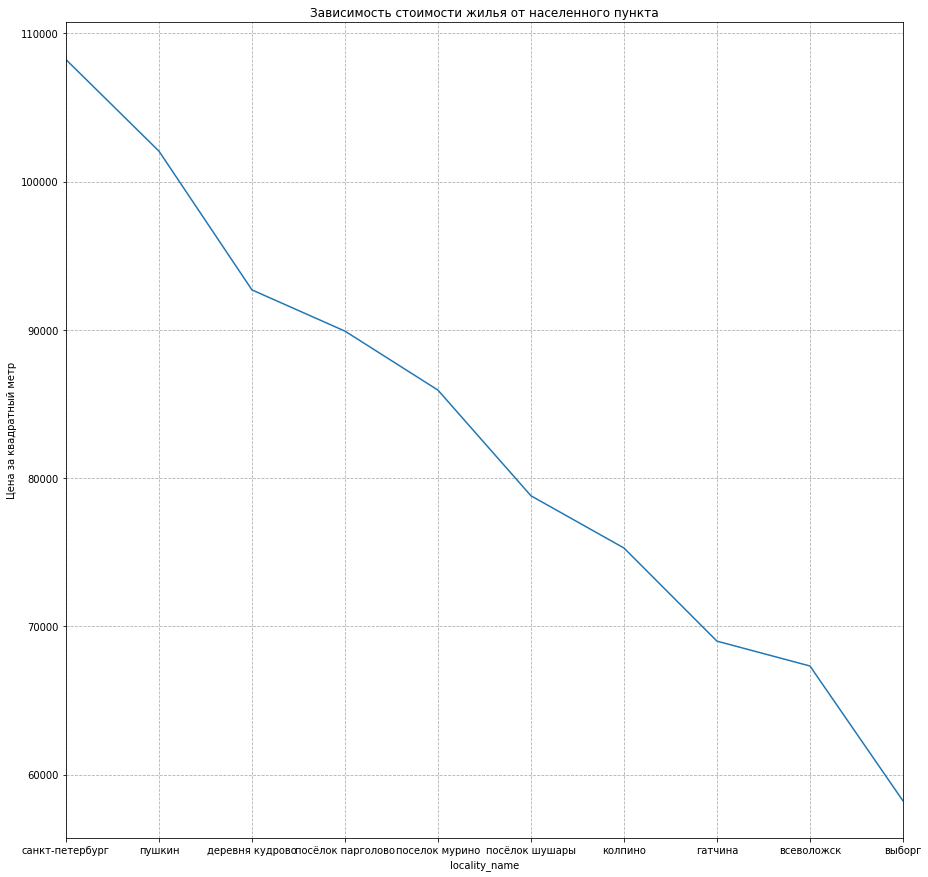

In [98]:
#график зависимости цены от местоположения 
from matplotlib.pyplot import figure


top_cities_table.groupby('locality_name')['metr_price'].mean().sort_values(ascending=False).plot(
    title='Зависимость стоимости жилья от населенного пункта', figsize=(15, 15))
plt.grid(True, linestyle='--')
plt.ylabel('Цена за квадратный метр')

#### Вывод
Самая высокая средняя стоимость жилья, ожидаемо, в Санкт-Петербурге - почти 115 тыс. рублей за квадраьтный метр.

Самая низкая - в Выборге - всего 58 с небольшим тыс. рублей.


#### Квартиры в Санкт-Петербурге 

In [99]:
#отфильтруем таблицу по Санкт-Петербургу
peter_table = good_price_time_data[good_price_time_data['locality_name'] == 'санкт-петербург'].reset_index(drop=True)

In [100]:
peter_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13457 entries, 0 to 13456
Data columns (total 30 columns):
total_images            13457 non-null int64
last_price              13457 non-null int64
total_area              13457 non-null float64
first_day_exposition    13457 non-null datetime64[ns]
rooms                   13457 non-null int64
ceiling_height          13457 non-null float64
floors_total            13457 non-null int64
living_area             13457 non-null float64
floor                   13457 non-null int64
is_apartment            13457 non-null object
studio                  13457 non-null bool
open_plan               13457 non-null bool
kitchen_area            13457 non-null float64
balcony                 13457 non-null int64
locality_name           13457 non-null object
airports_nearest        13457 non-null float64
city_centers_nearest    13457 non-null float64
parks_around_3000       13457 non-null int64
parks_nearest           13457 non-null int64
ponds_around_30

In [101]:
print('Медианное расстояние до центра:', peter_table['city_centers_nearest'].median())
print('Среднее расстояние до центра:', peter_table['city_centers_nearest'].mean())

Медианное расстояние до центра: 12565.0
Среднее расстояние до центра: 12031.292933046


In [102]:
#создадим столбец с расстояние до центра в километрах
peter_table['city_centers_kilo'] = peter_table['city_centers_nearest'] / 1000

In [103]:
#переведем в целый тип, тем самым округлив дроби
peter_table['city_centers_kilo'] = peter_table['city_centers_kilo'].astype('int')

In [104]:
print('Максимальное расстояние до центра:', peter_table['city_centers_kilo'].max())
print('Минимальное расстояние до центра:', peter_table['city_centers_kilo'].min())
print('Медианное расстояние до центра:', peter_table['city_centers_kilo'].median())
print('Среднее расстояние до центра:',peter_table['city_centers_kilo'].mean())

Максимальное расстояние до центра: 29
Минимальное расстояние до центра: 0
Медианное расстояние до центра: 12.0
Среднее расстояние до центра: 11.535632013078695


In [105]:
#самый центр города выделим как все квартиры на расстоянии не более 4 км
peter_table_center = peter_table.query('city_centers_kilo <= 4')
peter_table_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,weekday,metr_price,living_area_total,kitchen_area_total,floor_income,month,year,time_exposition_days,city_centers_kilo
10,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,265,5,66872.427984,0.478395,0.201646,Первый этаж,10,2015,Среднее время продажи,2
31,2,20000000,118.0,2018-09-11,3,3.00,9,68.0,7,False,...,37,1,169491.525424,0.576271,0.135593,Другие,9,2018,Быстрая продажа,4
45,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,104,1,106666.666667,0.744444,0.088889,Другие,9,2017,Среднее время продажи,2
60,20,33000000,180.0,2017-02-17,3,2.90,9,86.0,8,False,...,144,4,183333.333333,0.477778,0.133333,Другие,2,2017,Среднее время продажи,4
67,16,6500000,51.8,2018-08-01,2,3.45,6,25.6,2,False,...,163,2,125482.625483,0.494208,0.140927,Другие,8,2018,Среднее время продажи,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13401,0,21187872,123.3,2017-04-25,3,2.65,1,50.4,18,False,...,104,1,171840.000000,0.408759,0.191403,Другие,4,2017,Среднее время продажи,4
13408,0,8700000,73.0,2019-01-23,3,2.65,4,45.0,4,False,...,34,2,119178.082192,0.616438,0.123288,Последний этаж,1,2019,Быстрая продажа,2
13414,7,7280000,64.3,2018-07-20,2,2.65,10,34.6,10,False,...,21,4,113219.284603,0.538103,0.177294,Последний этаж,7,2018,Быстрая продажа,4
13431,7,4990000,62.5,2018-04-26,2,2.70,4,32.3,4,False,...,166,3,79840.000000,0.516800,0.193600,Последний этаж,4,2018,Среднее время продажи,4


In [106]:
#посчитайте среднюю цену для каждого километра
peter_table_center.groupby('city_centers_kilo')['metr_price'].mean()

city_centers_kilo
0    122489.221863
1    124153.294247
2    116034.005991
3    115604.158912
4    123445.355917
Name: metr_price, dtype: float64

In [107]:
#Создаем таблицу с расстоянием и соответствующей ему средней стоимостью квадратного метра жилья
data_kilo_price = [
    {'km': '0', 'Price_mean': 179617},
    {'km': '1', 'Price_mean': 173903},
    {'km': '2', 'Price_mean': 148884},
    {'km': '3', 'Price_mean': 129244},
    {'km': '4', 'Price_mean': 137792},
]   

middle_kilo_price = pd.DataFrame(data_kilo_price)
print(middle_kilo_price)    


  km  Price_mean
0  0      179617
1  1      173903
2  2      148884
3  3      129244
4  4      137792


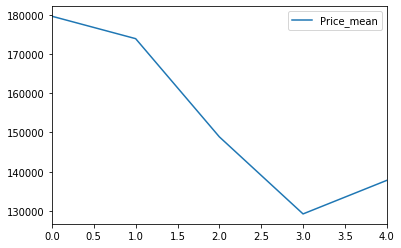

In [108]:
#График показывает, как цена зависит от удалённости от центра
middle_kilo_price.plot()

#### Вывод

Самые высокие цены на квартиры - в первом километре от центра. Далее кривая начинает крутое пике вниз. Примечательно, что к третьему километру цена падает, а затем опять растет. На это могут влиять и другие факторы, например, более современные жилые комплексы, наличие школ, детских садов и других объектов инфраструктуры, которые не всегда есть в историческом центре города.

### Сегмент квартир в центре

In [109]:
#изучим площадь квартир в центре Петербурга, это данные в таблице peter_table_center
print('Медианная площадь жилья в центре Питера', peter_table_center['total_area'].median())
print('Средняя площадь жилья в центре Питера', peter_table_center['total_area'].mean())
print('Минимальная площадь жилья в центре Питера', peter_table_center['total_area'].min())
print('Максимальная площадь жилья в центре Питера', peter_table_center['total_area'].max())

Медианная площадь жилья в центре Питера 77.0
Средняя площадь жилья в центре Питера 83.91340155257588
Минимальная площадь жилья в центре Питера 13.2
Максимальная площадь жилья в центре Питера 315.0


In [110]:
#изучим сегмент квартир в центре, он сохранен в таблице peter_table_center
#изучим цену - общую
print('Медианная стоимость жилья в центре Питера', peter_table_center['last_price'].median())
print('Средняя стоимость жилья в центре Питера', peter_table_center['last_price'].mean())
print('Минимальная стоимость жилья в центре Питера', peter_table_center['last_price'].min())
print('Максимальная стоимость жилья в центре Питера', peter_table_center['last_price'].max())

Медианная стоимость жилья в центре Питера 8500000.0
Средняя стоимость жилья в центре Питера 9922419.684544813
Минимальная стоимость жилья в центре Питера 1600000
Максимальная стоимость жилья в центре Питера 55000000


In [111]:
#и цену за квадратный метр
print('Медианная стоимость квадратного метра жилья в центре Питера', peter_table_center['metr_price'].median())
print('Средняя стоимость квадратного метра жилья в центре Питера', peter_table_center['metr_price'].mean())
print('Минимальная стоимость квадратного метра жилья в центре Питера', peter_table_center['metr_price'].min())
print('Максимальная стоимость квадратного метра жилья в центре Питера', peter_table_center['metr_price'].max())

Медианная стоимость квадратного метра жилья в центре Питера 116487.45519713263
Средняя стоимость квадратного метра жилья в центре Питера 120273.37693327604
Минимальная стоимость квадратного метра жилья в центре Питера 15861.571737563087
Максимальная стоимость квадратного метра жилья в центре Питера 199556.54101995565


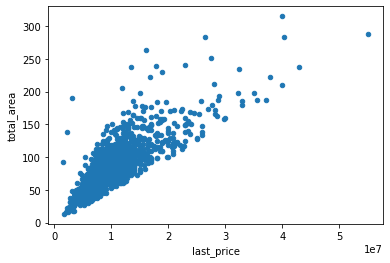

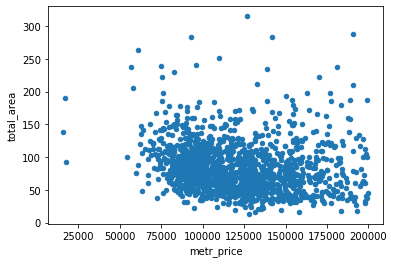

In [112]:
#построим графики для общей цены и для цены за кв метр
data_set = ['last_price', 'metr_price']
for plot in data_set:
    peter_table_center.plot(x=plot, y='total_area', kind='scatter')

In [113]:
#вполне логично - чем больше площадь, тем больше стоимость, корреляция весьма высокая
peter_table_center['last_price'].corr(peter_table_center['total_area'])

0.8128811174197792

In [114]:
# при этом площадь почти не влияет на цену квадратного метра
peter_table_center['metr_price'].corr(peter_table_center['total_area'])

-0.14605632468935742

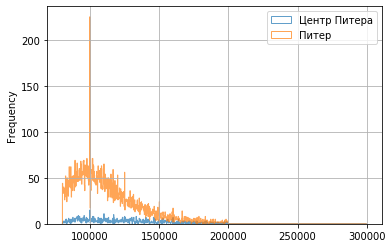

In [115]:
#посмотрим на графиках, как различаются цена кв метра в центре Питера от общей по Питеру
ax = peter_table_center.plot(
    kind='hist',
    y='metr_price',
    histtype='step',
    range=(80000, 300000),
    bins=1000,
    linewidth=1,
    alpha=0.7,
    label='Центр Питера',
)
peter_table.plot(
    kind='hist',
    y='metr_price',
    histtype='step',
    range=(80000, 300000),
    bins=1000,
    linewidth=1,
    alpha=0.7,
    label='Питер',
    ax=ax,
    grid=True,
    legend=True,

)

In [116]:
# изучим число комант квартир в центре питера
print('Медианное число комнат квартир в центре Питера', peter_table_center['rooms'].median())
print('Среднее число комнат квартир в центре Питера', peter_table_center['rooms'].mean())


Медианное число комнат квартир в центре Питера 3.0
Среднее число комнат квартир в центре Питера 2.744530698659139


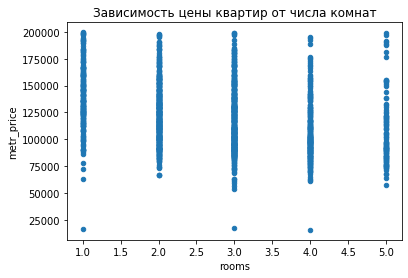

In [117]:
#изучим, квартиры с каким числом комнат имеют самую высокую стоимость квадратного метра 
peter_table_center.plot(x='rooms', y = 'metr_price', kind='scatter', title='Зависимость цены квартир от числа комнат')


In [118]:
# изучим высоту потолков квартир в центре питера
print('Медианная высота потолков в квартирах в центре Питера', peter_table_center['ceiling_height'].median())
print('Средняя высота потолков в квартирах в центре Питера', peter_table_center['ceiling_height'].mean())

Медианная высота потолков в квартирах в центре Питера 2.9
Средняя высота потолков в квартирах в центре Питера 2.9761820748059282


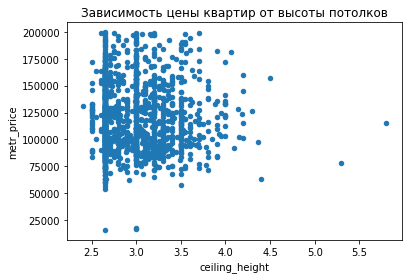

In [119]:
#изучим, квартиры с какой высотой потолков  имеют самую высокую стоимость квадратного метра 
peter_table_center.plot(x='ceiling_height', y = 'metr_price', kind='scatter', 
                        title='Зависимость цены квартир от высоты потолков')

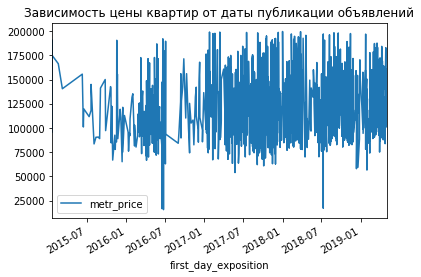

In [120]:
#изучим, есть ли зависимость даты подачи объявления и стоимости квадратного метра жилья в центре Питера
peter_table_center.plot(x='first_day_exposition', y = 'metr_price', 
                        title='Зависимость цены квартир от даты публикации объявлений')

**Вывод**

Медианный показатель площади квартир в центре Питера - более 80 кв метров. При этом в целом по городу этот показатель ниже - чуть первышает 54 кв метра. Такая жеситуация и с ценой за квадратный метр - в центре горда этот показатель составляеь 120 тыс. руб за кв метр, а в целом по городу - чуть больше 104 тыс. рублей. Высота потолков - выше по сравнению с отсальным городом примерно на 30 см, а число комнат, согласно медианным значениям, 3 против 2 по всмему городу.

Таким образом, номерной фонд в центре, ожидаемо, дороже, а квартиры - несколько просторнее как по числу комнат, так и по высоте потолков.

Выяснилась также зависимость цены кв метра в центре от даты размещения объявления - на графике видно, что за последние 6 лет цена неоднократно колебалась, а наиболее выгодно можно было продать квартиру весной 2017 года и весно 2019 года.

## Общий вывод

Мы изучили данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наиболее часто продавались квартиры площадью районе 50 кв метров, при этом попадались объявления о продаже загородной недвижимости даже на 900 кв метров.

Большинство квартир продаются в течение первого года, причем, даже большая из них часть - в первые три месяца (95 дней). Если квартиры не продаются 1,5 и более года, то это говорит о сложном объекте, например, загородная недвижимость в депрессивном поселке.

Ожидаемо, цена квартиры в большиснтве случаев зависит от ее площади. Далее среди факторов, влияющих на стоимость, следует удаленность от центра. Но тут уже все не так просто - так как в данных есть объявления о загородной неждвижимости, то цена, например, коттеджа под Питером, может превышать стоимость небольшой квартиры в его центре.

Также в ходе исследования обнаружена зависимость цены от дня недели, в который было размещено объявление - неожиданно, но в выходные эта цена ниже. Также есть "провал" по ценам в летние месяцы (сезон отпусков, спад деловой активности) и в период до, во время, и после Новогодних праздников. Кроме того, пик стоимости кв метра жилья в Петербурге и области пришелся на 2017-2018 годы, затем эта стоимость заметно упала.

Санкт-Петербург, Пушкин и деревня Кудрово оказались населенными пунктами с самым большим количеством объявлений о продаже квартир. Это вполне ожидаемо, так как в них и самая высокая плотность населения.

В целом полученные выводы справедливы и для квартир, расположенных в центре Питера. Однако, номерной фонд в центре, ожидаемо, дороже, а квартиры - несколько просторнее как по числу комнат, так и по высоте потолков.